## lavoro di gruppo Luca Longo,Davide Chiurlo,Ilary Pariona 

## Analisi delle prestazioni nello studio: Un'esplorazione dei dati

In [ ]:
import pandas as pd
df = pd.read_csv('study_performance.csv')

## Studio sulle Prestazioni: Analisi dei Dati

In [2]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Percentuale di Dati Mancanti nel Dataset di Prestazioni Studio

In [3]:
percentage_missing = df.isnull().sum() * 100 / len(df)
print(percentage_missing)

gender                         0.0
race_ethnicity                 0.0
parental_level_of_education    0.0
lunch                          0.0
test_preparation_course        0.0
math_score                     0.0
reading_score                  0.0
writing_score                  0.0
dtype: float64


# I punteggi

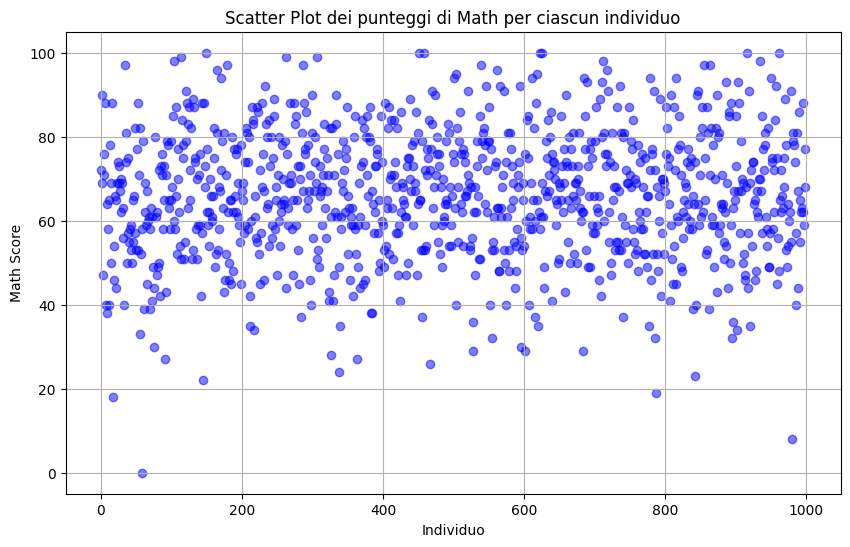

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['math_score'], color='blue', alpha=0.5)
plt.title('Scatter Plot dei punteggi di Math per ciascun individuo')
plt.xlabel('Individuo')
plt.ylabel('Math Score')
plt.grid(True)
plt.show()

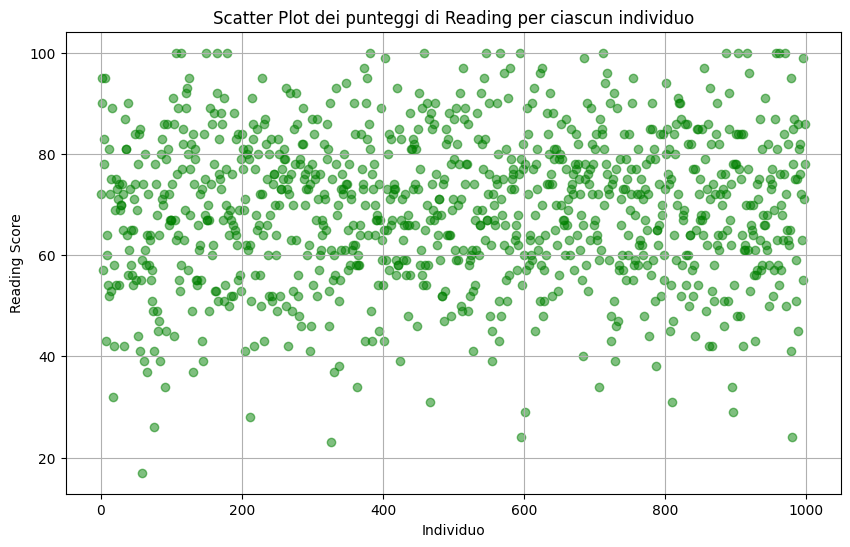

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['reading_score'], color='green', alpha=0.5)
plt.title('Scatter Plot dei punteggi di Reading per ciascun individuo')
plt.xlabel('Individuo')
plt.ylabel('Reading Score')
plt.grid(True)
plt.show()

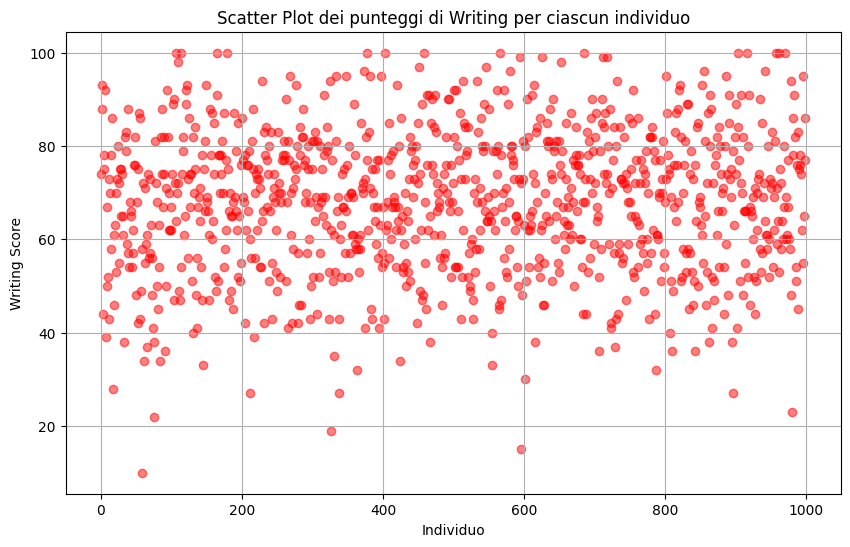

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['writing_score'], color='red', alpha=0.5)
plt.title('Scatter Plot dei punteggi di Writing per ciascun individuo')
plt.xlabel('Individuo')
plt.ylabel('Writing Score')
plt.grid(True)
plt.show()

# la correlazione fra i punteggi

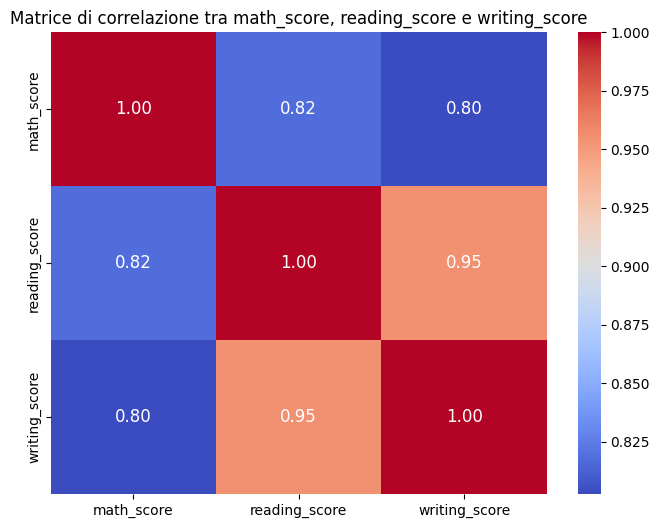

In [16]:
import seaborn as sns

correlation_matrix = df[['math_score', 'reading_score', 'writing_score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Matrice di correlazione tra math_score, reading_score e writing_score')
plt.show()

# outliers

In [20]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_std = 3

mean = df[numeric_cols].mean()
std_dev = df[numeric_cols].std()

outliers = ((df[numeric_cols] < (mean - num_std * std_dev)) | (df[numeric_cols] > (mean + num_std * std_dev)))

df['outliers'] = outliers.any(axis=1)

df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,outliers
0,female,group B,bachelor's degree,standard,none,72,72,74,False
1,female,group C,some college,standard,completed,69,90,88,False
2,female,group B,master's degree,standard,none,90,95,93,False
3,male,group A,associate's degree,free/reduced,none,47,57,44,False
4,male,group C,some college,standard,none,76,78,75,False
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,False
996,male,group C,high school,free/reduced,none,62,55,55,False
997,female,group C,high school,free/reduced,completed,59,71,65,False
998,female,group D,some college,standard,completed,68,78,77,False


In [21]:
df = df[df['outliers'] == False]
df = df.drop(columns=['outliers'])
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# senza outlier

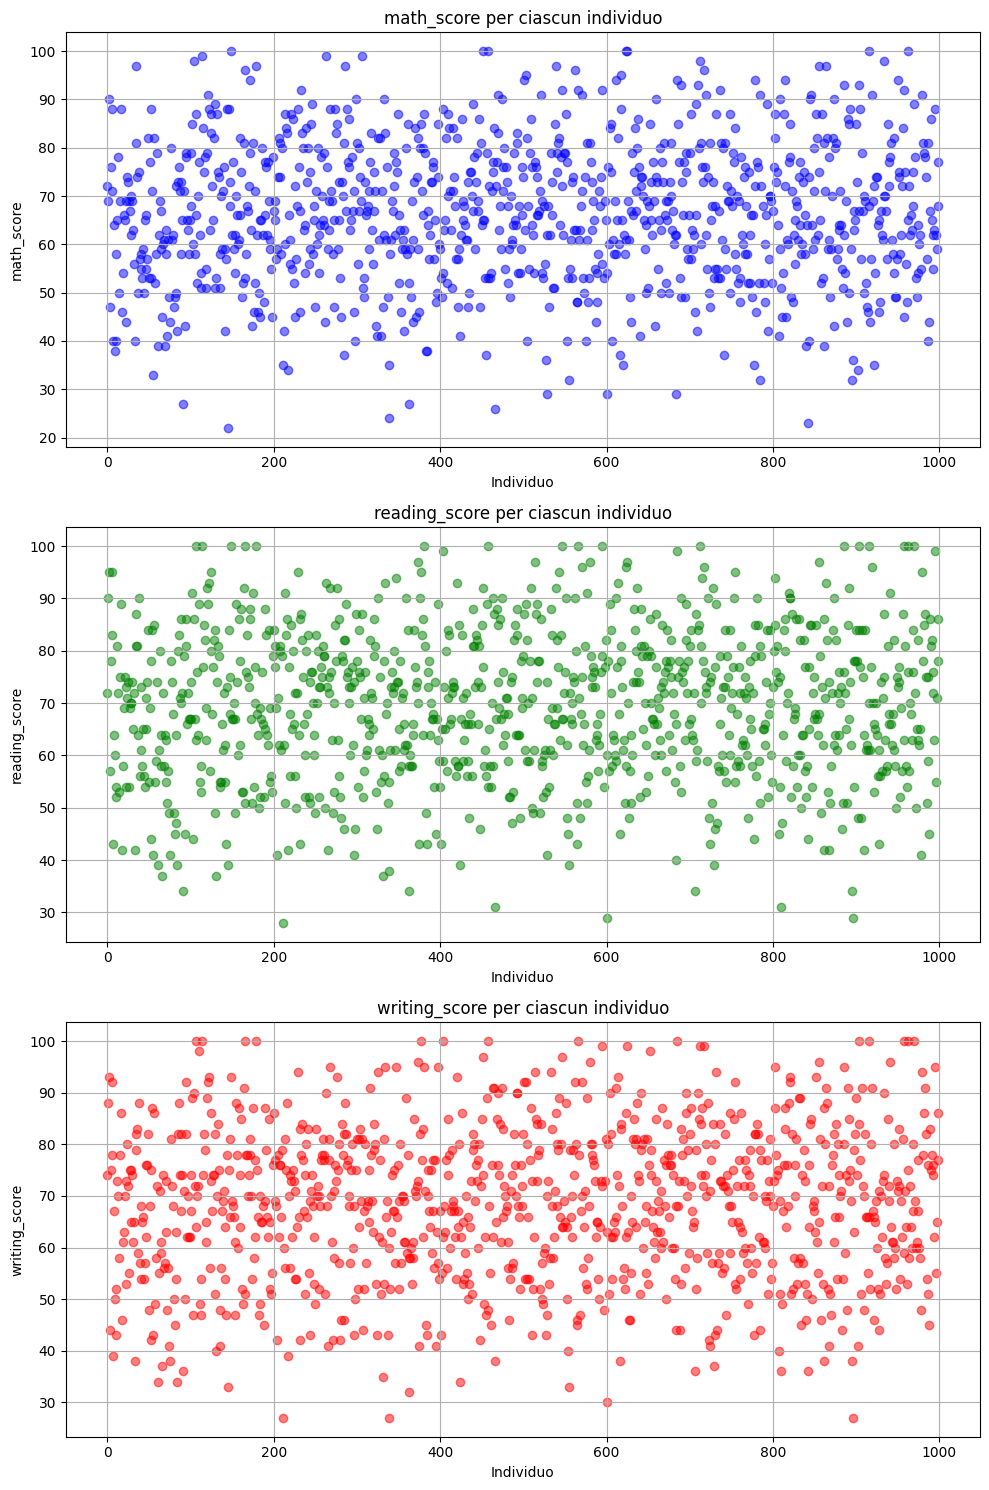

In [23]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
axs[0].scatter(df.index, df['math_score'], color='blue', alpha=0.5)
axs[0].set_title('math_score per ciascun individuo')
axs[0].set_xlabel('Individuo')
axs[0].set_ylabel('math_score')
axs[0].grid(True)

axs[1].scatter(df.index, df['reading_score'], color='green', alpha=0.5)
axs[1].set_title('reading_score per ciascun individuo')
axs[1].set_xlabel('Individuo')
axs[1].set_ylabel('reading_score')
axs[1].grid(True)

axs[2].scatter(df.index, df['writing_score'], color='red', alpha=0.5)
axs[2].set_title('writing_score per ciascun individuo')
axs[2].set_xlabel('Individuo')
axs[2].set_ylabel('writing_score')
axs[2].grid(True)

plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,1,0.380705,0.178308,0.381755
1,0,2,4,1,0,0.175990,1.447554,1.333370
2,0,1,3,1,1,1.608994,1.800122,1.673233
3,1,0,0,0,1,-1.325252,-0.879397,-1.657421
4,1,2,4,1,1,0.653658,0.601390,0.449728
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,1.472517,2.082176,1.809178
996,1,2,2,0,1,-0.301678,-1.020424,-0.909723
997,0,2,2,0,0,-0.506393,0.107794,-0.229998
998,0,3,4,1,0,0.107752,0.601390,0.585673


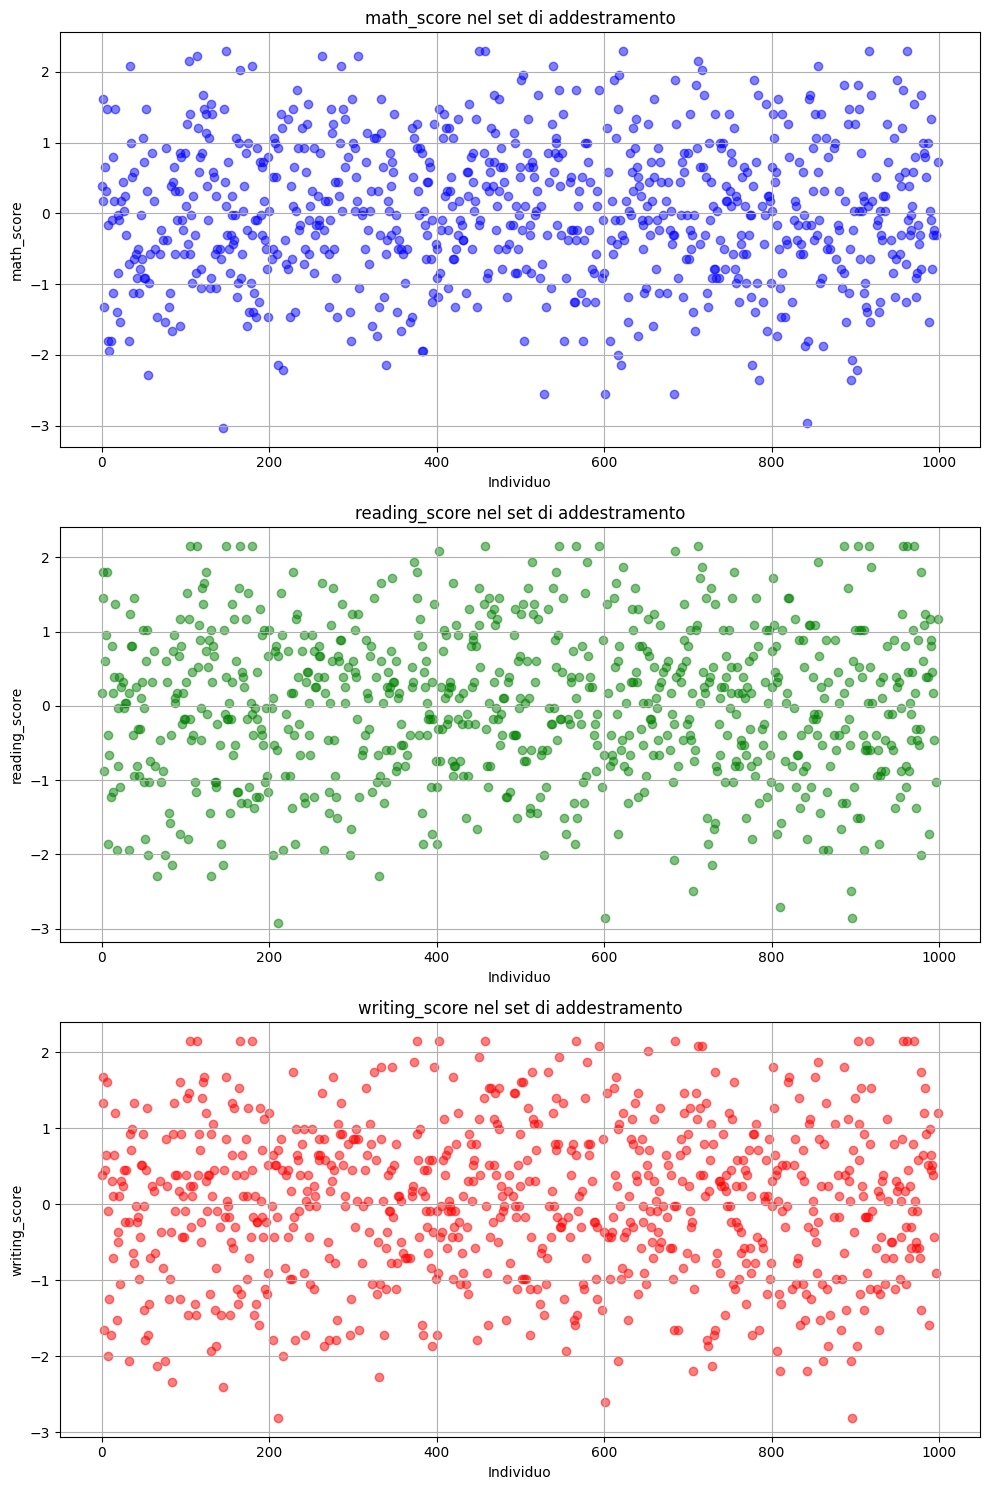

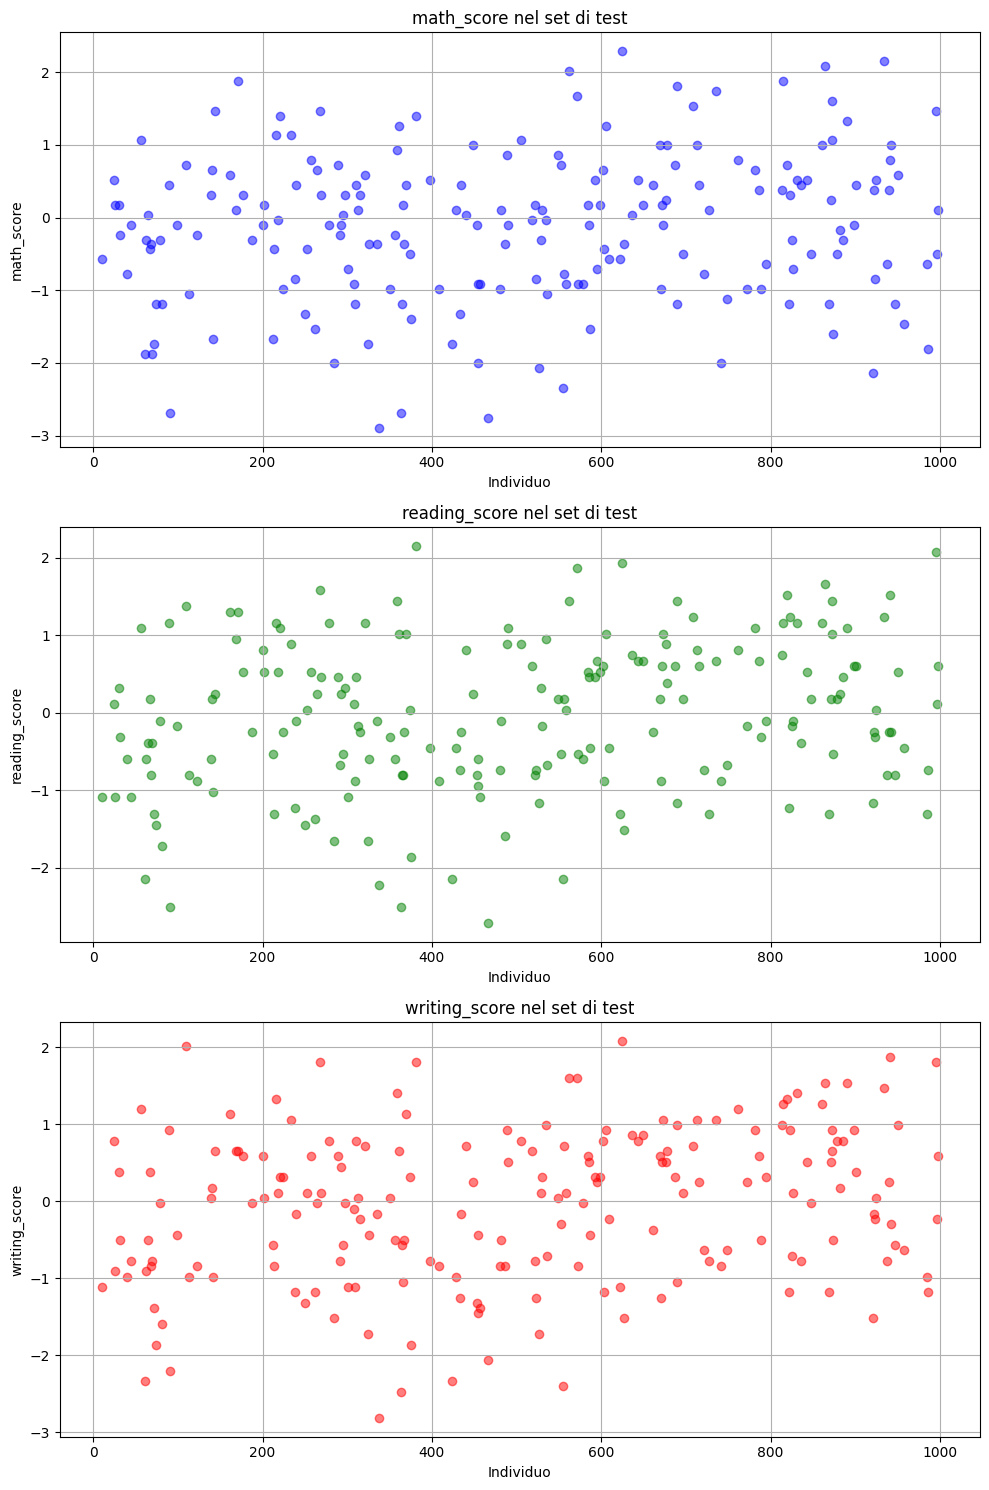

In [26]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

fig, axs_train = plt.subplots(3, 1, figsize=(10, 15))

axs_train[0].scatter(train_df.index, train_df['math_score'], color='blue', alpha=0.5)
axs_train[0].set_title('math_score nel set di addestramento')
axs_train[0].set_xlabel('Individuo')
axs_train[0].set_ylabel('math_score')
axs_train[0].grid(True)

axs_train[1].scatter(train_df.index, train_df['reading_score'], color='green', alpha=0.5)
axs_train[1].set_title('reading_score nel set di addestramento')
axs_train[1].set_xlabel('Individuo')
axs_train[1].set_ylabel('reading_score')
axs_train[1].grid(True)

axs_train[2].scatter(train_df.index, train_df['writing_score'], color='red', alpha=0.5)
axs_train[2].set_title('writing_score nel set di addestramento')
axs_train[2].set_xlabel('Individuo')
axs_train[2].set_ylabel('writing_score')
axs_train[2].grid(True)

plt.tight_layout()
plt.show()

fig, axs_test = plt.subplots(3, 1, figsize=(10, 15))

axs_test[0].scatter(test_df.index, test_df['math_score'], color='blue', alpha=0.5)
axs_test[0].set_title('math_score nel set di test')
axs_test[0].set_xlabel('Individuo')
axs_test[0].set_ylabel('math_score')
axs_test[0].grid(True)

axs_test[1].scatter(test_df.index, test_df['reading_score'], color='green', alpha=0.5)
axs_test[1].set_title('reading_score nel set di test')
axs_test[1].set_xlabel('Individuo')
axs_test[1].set_ylabel('reading_score')
axs_test[1].grid(True)

axs_test[2].scatter(test_df.index, test_df['writing_score'], color='red', alpha=0.5)
axs_test[2].set_title('writing_score nel set di test')
axs_test[2].set_xlabel('Individuo')
axs_test[2].set_ylabel('writing_score')
axs_test[2].grid(True)

plt.tight_layout()
plt.show()